In [67]:
# Aufgabe 2

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

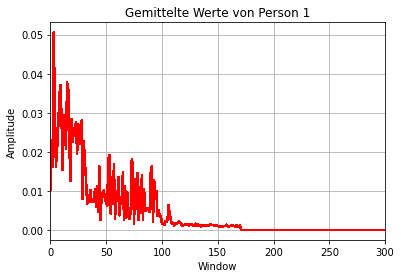

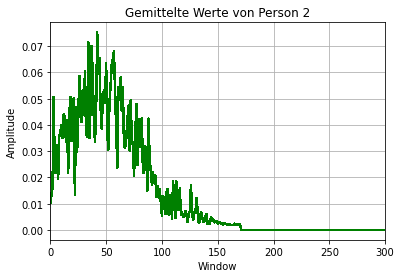

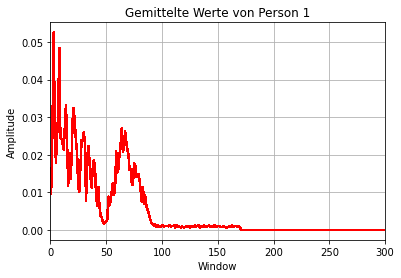

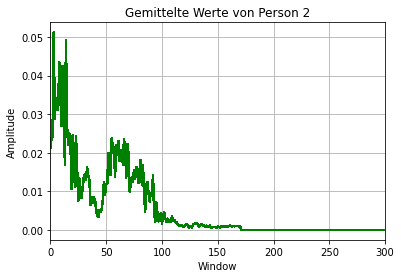

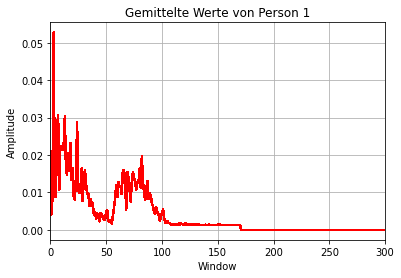

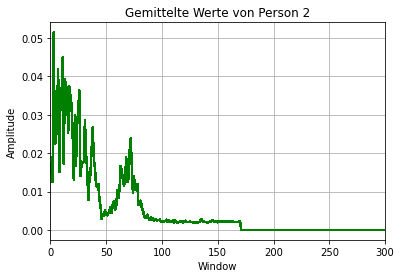

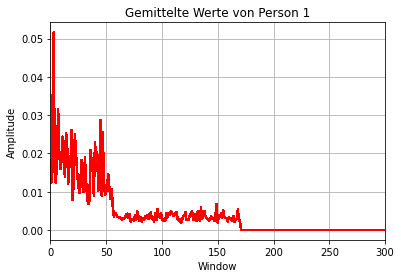

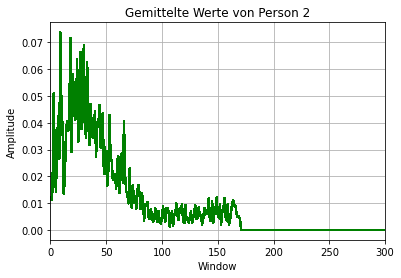

In [68]:
# DateiNamen 

num = ["Hoch1", "Hoch2", "Hoch3", "Hoch4", "Hoch5", "Links1D", "Links2D","Links3D", "Links4D", "Links5D",
        "Rechts1D", "Rechts2D","Rechts3D","Rechts4D","Rechts5D","Tief1D","Tief2D","Tief3D","Tief4D","Tief5D"]

num2 = ["Hoch1T","Hoch2T","Hoch3T","Hoch4T","Hoch5T","Links1T","Links2T","Links3T","Links4T","Links5T",
        "Rechts1T","Rechts2T","Rechts3T","Rechts4T","Rechts5T","Tief1T","Tief2T","Tief3T","Tief4T","Tief5T"]

num_result = ["Hoch1","Hoch2","Hoch3","Hoch4","Hoch5","Links1","Links2","Links3","Links4","Links5",
            "Rechts1","Rechts2","Rechts3","Rechts4","Rechts5","Tief1","Tief2","Tief3","Tief4","Tief5"]

# Ergebnisse
num_mean = ["hoch", "links", "rechts","tief" ]
num2_mean = ["hoch", "links", "rechts","tief"]
result = ["hoch", "links", "rechts","tief" ]

# Gaußfenster mit Fensterbreite Standardabweichung 4
gaussianwindow = signal.windows.gaussian(512, std=4)

# For loop für alle Dateien
for i in range(0, 20):
    # Einlesen der Numpy Dateien von Person 1 & 2
    data = np.zeros(44100)
    data2 = np.zeros(44100)
    data = np.load(".//Recordings//Befehle//"+str(num[i])+".npy")
    data2 = np.load(".//Recordings//Befehle//"+str(num2[i])+".npy")
    # leere Vektoren für Person 1 & 2
    num[i] = np.zeros((768, 512))
    num2[i] = np.zeros((768, 512))

    # Mitte
    z = 256

    # For loop um die einzelnen Windows zu erstellen
    for y in range(0, 768):
        z = z - 256

        # Jedes Sample durchlaufen
        for x in range(0, 512):
            
            # Fouriertransformieren und mit Fenster multiplizieren
            num[i][y, x] = np.mean(np.abs(np.fft.fft(data[z] * gaussianwindow)))
            num2[i][y, x] = np.mean(np.abs(np.fft.fft(data2[z] * gaussianwindow)))
            z = z + 1

            # Abbruchbedingung, da nicht alle Aufnamen identisch lang sind
            if ( z == data.shape[0] or z == data2.shape[0] ): 
                break

        # TestPlot Window

        #plt.plot(num[i][y])
        #plt.title('Windownr' + str(y+1+(i*171)))
        #plt.xlabel('Signalnr.')
        #plt.ylabel('Frequenz')
        #plt.grid(True)
        #plt.show()

    # For loop um die einzelnen Windows zu erstellen
    for y in range(0, 768):
        # For loop um die einzelnen Frames zu berechnen
        for x in range(0, 512):
            # mit Fenster multiplizieren
            num[i][y, x] = num[i][y, x] * gaussianwindow[x]
            num2[i][y, x] = num2[i][y, x] * gaussianwindow[x]
        
        # Absolute Werte und das jeweilige Mittel
        num[i][y] = np.abs(np.fft.fft(num[i][y]))
        num2[i][y] = np.abs(np.fft.fft(num2[i][y]))
        num[i][y] = np.mean(num[i][y])
        num2[i][y] = np.mean(num2[i][y])

    # TestPlot (Mittelung)

    #plt.plot(num2[i], 'r')
    #plt.title(str(num_result[i]))
    #plt.grid(True)
    #plt.xlabel('Window')
    #plt.xlim(0,300)
    #plt.ylabel('Amplitude')
    #plt.show()

# TrainingsDaten
result_p1 = ["hoch", "links", "rechts", "tief"]
result_p2 = ["hoch", "links", "rechts", "tief"]

# For loop zur Ausgabe der endgültig berechneten Plots
for z in range(0, 4):
    # Vektoren zum Speichern der Plots
    result_p1[z] = np.zeros((768, 512))
    result_p2[z] = np.zeros((768, 512))
    # For loop für die einzelnen Windows
    for y in range(0, 171):
        # For loop für die einzelnen Samples
        for x in range(0, 512):
            # Hoch Mittelung
            if (z == 0):
                result_p1[z][y, x] = (num[0][y, x] + num[1][y, x] + num[2][y, x] + num[3][y, x]
                                    + num[4][y, x]) / 5
                result_p2[z][y, x] = (num2[0][y, x] + num2[1][y, x] + num2[2][y, x]
                                     + num2[3][y, x] + num2[4][y, x]) / 5
            # Links Mittelung
            elif (z == 1):
                result_p1[z][y, x] = (num[5][y, x] + num[6][y, x] + num[7][y, x] + num[8][y, x]
                                    + num[9][y, x]) / 5
                result_p2[z][y, x] = (num2[5][y, x] + num2[6][y, x] + num2[7][y, x] + num2[8][y, x]
                                     + num2[9][y, x]) / 5
            # Rechts Mittelung
            elif (z == 2):
                result_p1[z][y, x] = (num[10][y, x] + num[11][y, x] + num[12][y, x] + num[13][y, x]
                                    + num[14][y, x]) / 5
                result_p2[z][y, x] = (num2[10][y, x] + num2[11][y, x] + num2[12][y, x] + num2[13][y, x]
                                     + num2[14][y, x]) / 5
            # Tief Mittelung
            elif (z == 3):
                result_p1[z][y, x] = (num[15][y, x] + num[16][y, x] + num[17][y, x] + num[18][y, x]
                                    + num[19][y, x]) / 5
                result_p2[z][y, x] = (num2[15][y, x] + num2[16][y, x] + num2[17][y, x] + num2[18][y, x]
                                     + num2[19][y, x]) / 5
    # Geplotete Endwerte                                 
    plt.plot(result_p1[z], 'r')
    plt.title("Gemittelte Werte von Person 1")
    plt.grid(True)
    plt.xlabel('Window')
    plt.xlim(0,300)
    plt.ylabel('Amplitude')
    plt.show()

    plt.plot(result_p2[z], 'g')
    plt.title("Gemittelte Werte von Person 2")
    plt.grid(True)
    plt.xlabel('Window')
    plt.xlim(0,300)
    plt.ylabel('Amplitude')
    plt.show()        

In [77]:

# Umwandlung in 1-D Array
for x in range(0, 20):
    num[x] = num[x].ravel()
    num2[x] = num2[x].ravel()

for x in range(0, 4):   
    result_p1[x] = result_p1[x].ravel()

print(f"Vgl. Referenzspektren mit irgendeiner aufnahme")
# Probe (vgl. zwei identische)
r, p = scipy.stats.pearsonr(num[0], num[0])
print(f"Probe \t r:", r)
r, p = scipy.stats.pearsonr(num2[0], num2[0])
print(f"Probe \t r:", r)


# Koeffizient für die jeweiligen Befehle
r, p = scipy.stats.pearsonr(num[0], result_p1[0])
print(f"\nHoch \t r:", r)

r, p = scipy.stats.pearsonr(num[6], result_p1[1])
print(f"Links \t r:", r)

r, p = scipy.stats.pearsonr(num[11], result_p1[2])
print(f"Rechts \t r:", r)

r, p = scipy.stats.pearsonr(num[15], result_p1[3])
print(f"Tief \t r:", r)

# Zweite Person
print(f"\nPerson2:")
r, p = scipy.stats.pearsonr(num2[0], result_p1[0])
print(f"Hoch \t r:", r)

r, p = scipy.stats.pearsonr(num2[6], result_p1[1])
print(f"Links \t r:", r)

r, p = scipy.stats.pearsonr(num2[11], result_p1[2])
print(f"Rechts \t r:", r)

r, p = scipy.stats.pearsonr(num2[15], result_p1[3])
print(f"Tief \t r:", r)




Vgl. Referenzspektren mit irgendeiner aufnahme
Probe 	 r: 0.9999999999980874
Probe 	 r: 0.9999999999971403

Hoch 	 r: 0.7594017301151236
Links 	 r: 0.9007451613552369
Rechts 	 r: 0.7626712750791449
Tief 	 r: 0.8214407523410532

Person2:
Hoch 	 r: 0.6735296480622518
Links 	 r: 0.7817065698546387
Rechts 	 r: 0.7224704838744289
Tief 	 r: 0.5913329130604198


In [81]:
# Vgl. für alle Befehle "Hoch" beider Personen
print(f"\nPerson1:")
r1, p = scipy.stats.pearsonr(num[0], result_p1[0])
print(f"Hoch \t r:", r1)
r2, p = scipy.stats.pearsonr(num[1], result_p1[0])
print(f"Hoch \t r:", r2)
r3, p = scipy.stats.pearsonr(num[2], result_p1[0])
print(f"Hoch \t r:", r3)
r4, p = scipy.stats.pearsonr(num[3], result_p1[0])
print(f"Hoch \t r:", r4)
r5, p = scipy.stats.pearsonr(num[4], result_p1[0])
print(f"Hoch \t r:", r5)

mean1 = (r1+r2+r3+r4+r5) / 5
print(f'Mittelwert Person1\t',mean1)

# Zweite Person
print(f"\nPerson2:")
r6, p = scipy.stats.pearsonr(num2[0], result_p1[0])
print(f"Hoch \t r:", r6)
r7, p = scipy.stats.pearsonr(num2[1], result_p1[0])
print(f"Hoch \t r:", r7)
r8, p = scipy.stats.pearsonr(num2[2], result_p1[0])
print(f"Hoch \t r:", r8)
r9, p = scipy.stats.pearsonr(num2[3], result_p1[0])
print(f"Hoch \t r:", r9)
r10, p = scipy.stats.pearsonr(num2[4], result_p1[0])
print(f"Hoch \t r:", r10)

mean2 = (r6+r7+r8+r9+r10) / 5
print(f'Mittelwert Person2\t',mean2)


Person1:
Hoch 	 r: 0.7594017301151236
Hoch 	 r: 0.7794033986683538
Hoch 	 r: 0.8266719200527637
Hoch 	 r: 0.7000788451150494
Hoch 	 r: 0.7938978388202212
Mittelwert Person1	 0.7718907465543023

Person2:
Hoch 	 r: 0.6735296480622518
Hoch 	 r: 0.5739454800699395
Hoch 	 r: 0.5261996919831834
Hoch 	 r: 0.46580268831678767
Hoch 	 r: 0.6100914856372134
Mittelwert Person2	 0.569913798813875


In [82]:
# Vgl. für alle Befehle "Links" beider Personen
print(f"\nPerson1:")
r1, p = scipy.stats.pearsonr(num[5], result_p1[1])
print(f"Links \t r:", r1)
r2, p = scipy.stats.pearsonr(num[6], result_p1[1])
print(f"Links \t r:", r2)
r3, p = scipy.stats.pearsonr(num[7], result_p1[1])
print(f"Links \t r:", r3)
r4, p = scipy.stats.pearsonr(num[7], result_p1[1])
print(f"Links \t r:", r4)
r5, p = scipy.stats.pearsonr(num[9], result_p1[1])
print(f"Links \t r:", r5)

mean1 = (r1+r2+r3+r4+r5) / 5
print(f'Mittelwert Person1\t',mean1)

# Zweite Person
print(f"\nPerson2:")
r6, p = scipy.stats.pearsonr(num2[5], result_p1[1])
print(f"Links \t r:", r6)
r7, p = scipy.stats.pearsonr(num2[6], result_p1[1])
print(f"Links \t r:", r7)
r8, p = scipy.stats.pearsonr(num2[7], result_p1[1])
print(f"Links \t r:", r8)
r9, p = scipy.stats.pearsonr(num2[8], result_p1[1])
print(f"Links \t r:", r9)
r10, p = scipy.stats.pearsonr(num2[9], result_p1[1])
print(f"Links \t r:", r10)

mean2 = (r6+r7+r8+r9+r10) / 5
print(f'Mittelwert Person2\t',mean2)


Person1:
Links 	 r: 0.8874988580894694
Links 	 r: 0.9007451613552369
Links 	 r: 0.907684610575048
Links 	 r: 0.907684610575048
Links 	 r: 0.8820436284035371
Mittelwert Person1	 0.8971313737996678

Person2:
Links 	 r: 0.8291237417451661
Links 	 r: 0.7817065698546387
Links 	 r: 0.7298415270274305
Links 	 r: 0.7799576397280416
Links 	 r: 0.7409464396145504
Mittelwert Person2	 0.7723151835939654


In [83]:
# Vgl. für alle Befehle "Rechts" beider Personen
print(f"\nPerson1:")
r1, p = scipy.stats.pearsonr(num[10], result_p1[2])
print(f"Rechts \t r:", r1)
r2, p = scipy.stats.pearsonr(num[11], result_p1[2])
print(f"Rechts \t r:", r2)
r3, p = scipy.stats.pearsonr(num[12], result_p1[2])
print(f"Rechts \t r:", r3)
r4, p = scipy.stats.pearsonr(num[13], result_p1[2])
print(f"Rechts \t r:", r4)
r5, p = scipy.stats.pearsonr(num[14], result_p1[2])
print(f"Rechts \t r:", r5)

mean1 = (r1+r2+r3+r4+r5) / 5
print(f'Mittelwert Person1\t',mean1)

# Zweite Person
print(f"\nPerson2:")
r6, p = scipy.stats.pearsonr(num2[10], result_p1[2])
print(f"Rechts \t r:", r6)
r7, p = scipy.stats.pearsonr(num2[11], result_p1[2])
print(f"Rechts \t r:", r7)
r8, p = scipy.stats.pearsonr(num2[12], result_p1[2])
print(f"Rechts \t r:", r8)
r9, p = scipy.stats.pearsonr(num2[13], result_p1[2])
print(f"Rechts \t r:", r9)
r10, p = scipy.stats.pearsonr(num2[14], result_p1[2])
print(f"Rechts \t r:", r10)

mean2 = (r6+r7+r8+r9+r10) / 5
print(f'Mittelwert Person2\t',mean2)


Person1:
Rechts 	 r: 0.8123438481526148
Rechts 	 r: 0.7626712750791449
Rechts 	 r: 0.6696055464508027
Rechts 	 r: 0.795876190643856
Rechts 	 r: 0.8053100242182204
Mittelwert Person1	 0.7691613769089278

Person2:
Rechts 	 r: 0.6194722222817316
Rechts 	 r: 0.7224704838744289
Rechts 	 r: 0.7000488179583995
Rechts 	 r: 0.7902672960599756
Rechts 	 r: 0.7836717552000336
Mittelwert Person2	 0.7231861150749139


In [84]:
# Vgl. für alle Befehle "Tief" beider Personen
print(f"\nPerson1:")
r1, p = scipy.stats.pearsonr(num[15], result_p1[3])
print(f"Tief \t r:", r1)
r2, p = scipy.stats.pearsonr(num[16], result_p1[3])
print(f"Tief \t r:", r2)
r3, p = scipy.stats.pearsonr(num[17], result_p1[3])
print(f"Tief \t r:", r3)
r4, p = scipy.stats.pearsonr(num[18], result_p1[3])
print(f"Tief \t r:", r4)
r5, p = scipy.stats.pearsonr(num[19], result_p1[3])
print(f"Tief \t r:", r5)

mean1 = (r1+r2+r3+r4+r5) / 5
print(f'Mittelwert Person1\t',mean1)

# Zweite Person
print(f"\nPerson2:")
r6, p = scipy.stats.pearsonr(num2[15], result_p1[3])
print(f"Tief \t r:", r6)
r7, p = scipy.stats.pearsonr(num2[16], result_p1[3])
print(f"Tief \t r:", r7)
r8, p = scipy.stats.pearsonr(num2[17], result_p1[3])
print(f"Tief \t r:", r8)
r9, p = scipy.stats.pearsonr(num2[18], result_p1[3])
print(f"Tief \t r:", r9)
r10, p = scipy.stats.pearsonr(num2[19], result_p1[3])
print(f"Tief \t r:", r10)

mean2 = (r6+r7+r8+r9+r10) / 5
print(f'Mittelwert Person2\t',mean2)


Person1:
Tief 	 r: 0.8214407523410532
Tief 	 r: 0.7407265077013984
Tief 	 r: 0.8321110883886772
Tief 	 r: 0.6713042573637521
Tief 	 r: 0.7485817983263324
Mittelwert Person1	 0.7628328808242426

Person2:
Tief 	 r: 0.5913329130604198
Tief 	 r: 0.6649500623964844
Tief 	 r: 0.6913457376919427
Tief 	 r: 0.6201722215742308
Tief 	 r: 0.46031496816151146
Mittelwert Person2	 0.6056231805769178
